In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
from IPython.display import clear_output

tqdm.pandas()
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 25

In [3]:
from dsutils.eda import *
from dsutils.stats import *
from dsutils.ml import *

In [4]:
from fuzzywuzzy import fuzz

In [5]:
data = pd.read_csv('basic_features_clean.csv')

In [6]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,lcs_token,lcs_token_ratio,q1_clean,q2_clean,abs_word_diff,avg_num_word,rel_word_diff,word_intersection,word_union,jaccard_similarity_word,lcs_word,lcs_word_ratio
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,13.0,0.153846,10,13,0.769231,11,0.846154,step step guid invest share market india,step step guid invest share market,1,6.5,0.153846,5,6,0.833333,6,0.923077
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,10.5,0.476190,4,16,0.250000,4,0.380952,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh noor diamond back,5,7.5,0.666667,4,11,0.363636,4,0.533333
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,12.0,0.333333,3,21,0.142857,3,0.250000,increas speed internet connect use vpn,internet speed increas hack dn,1,5.5,0.181818,3,8,0.375000,1,0.181818
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,10.0,0.200000,0,19,0.000000,0,0.000000,whi mental veri lone solv,find remaind math 23 24 math divid 24 23,4,7.0,0.571429,0,11,0.000000,0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,10.0,0.600000,2,18,0.111111,2,0.200000,one dissolv water quikli sugar salt methan carbon di oxid,fish would surviv salt water,5,7.5,0.666667,2,13,0.153846,1,0.133333


___
<center><b>fuzz_simple_ratio</b></center>


         min   1st  25th  50th  75th   99th  max   mean    std
0        1    19.0  45.0  59.0  76.0  100.0  100  60.19  19.83
1        10   40.0  66.0  76.0  87.0  100.0  100  76.06  14.98
overall  1    22.0  51.0  67.0  82.0  100.0  100  66.05  19.73


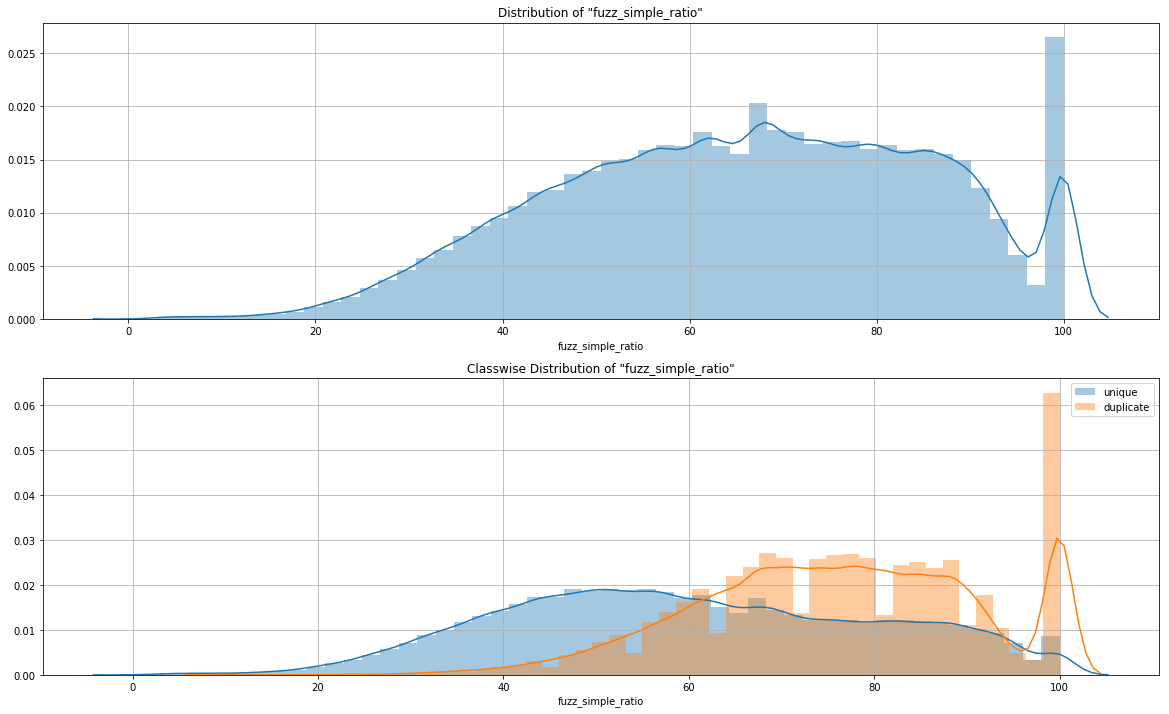

In [7]:
data['fuzz_simple_ratio'] = data[['q1_clean', 'q2_clean']].progress_apply(
    lambda row: fuzz.ratio(str(row['q1_clean']).split(), str(row['q2_clean']).split()),
    axis=1
)

print(feature_distribution(data, 'fuzz_simple_ratio', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'fuzz_simple_ratio', 'is_duplicate', labels=['unique', 'duplicate'])

___
<center><b>fuzz_partial_ratio</b></center>


         min   1st  25th  50th  75th   99th  max   mean    std
0        5    36.0  57.0  68.0  82.0  100.0  100  69.29  16.26
1        23   51.0  72.0  81.0  94.0  100.0  100  81.46  12.89
overall  5    38.0  62.0  74.0  87.0  100.0  100  73.78  16.21


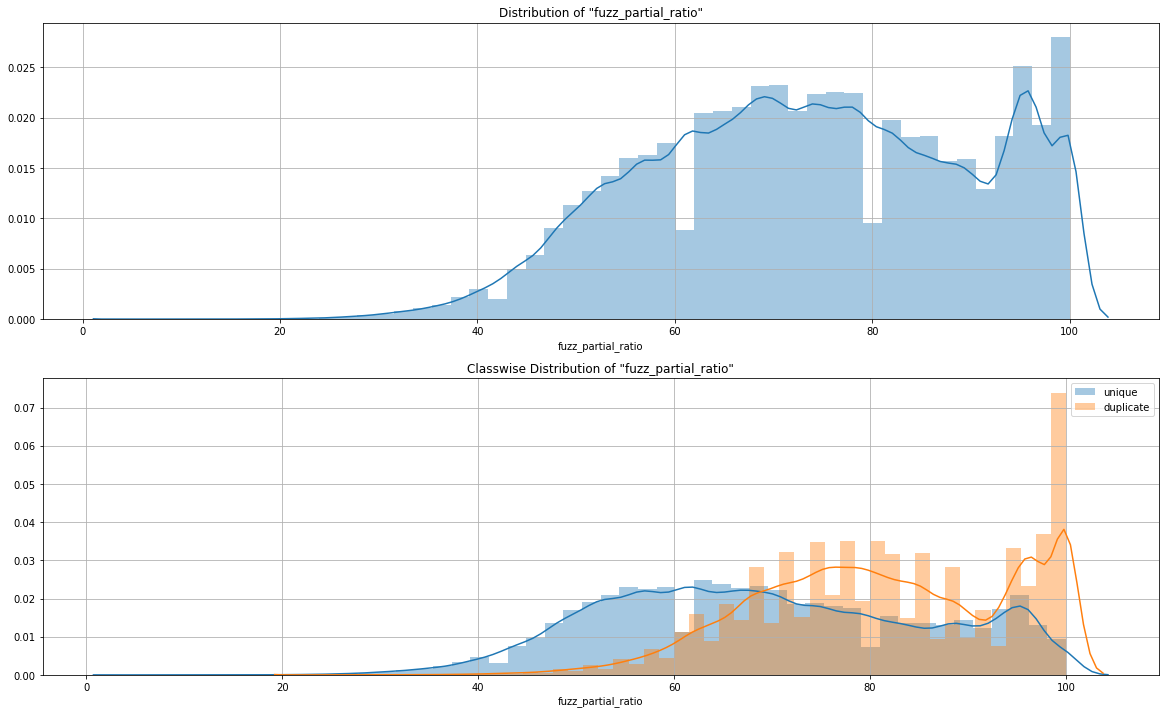

In [8]:
data['fuzz_partial_ratio'] = data[['q1_clean', 'q2_clean']].progress_apply(
    lambda row: fuzz.partial_ratio(str(row['q1_clean']).split(), str(row['q2_clean']).split()),
    axis=1
)

print(feature_distribution(data, 'fuzz_partial_ratio', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'fuzz_partial_ratio', 'is_duplicate', labels=['unique', 'duplicate'])

___
<center><b>fuzz_token_sort_ratio</b></center>


         min   1st  25th  50th  75th   99th  max   mean    std
0        0    14.0  42.0  56.0  73.0  100.0  100  56.77  20.93
1        10   39.0  63.0  75.0  87.0  100.0  100  74.92  15.93
overall  0    16.0  49.0  64.0  80.0  100.0  100  63.47  21.13


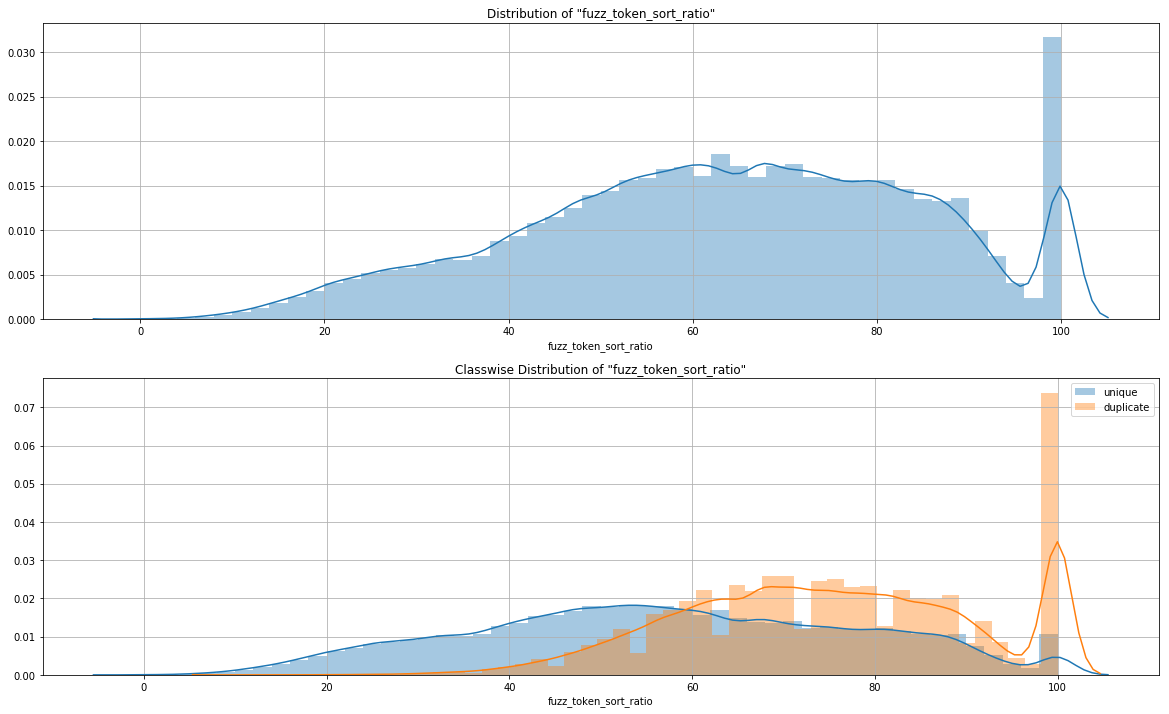

In [9]:
data['fuzz_token_sort_ratio'] = data[['q1_clean', 'q2_clean']].progress_apply(
    lambda row: fuzz.token_sort_ratio(str(row['q1_clean']).split(), str(row['q2_clean']).split()),
    axis=1
)

print(feature_distribution(data, 'fuzz_token_sort_ratio', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'fuzz_token_sort_ratio', 'is_duplicate', labels=['unique', 'duplicate'])

___
<center><b>fuzz_token_set_ratio</b></center>


         min   1st  25th  50th   75th   99th  max   mean    std
0        0    14.0  53.0  73.0  89.0   100.0  100  69.25  24.52
1        10   52.0  80.0  90.0  100.0  100.0  100  88.01  12.95
overall  0    16.0  63.0  81.0  100.0  100.0  100  76.18  22.87


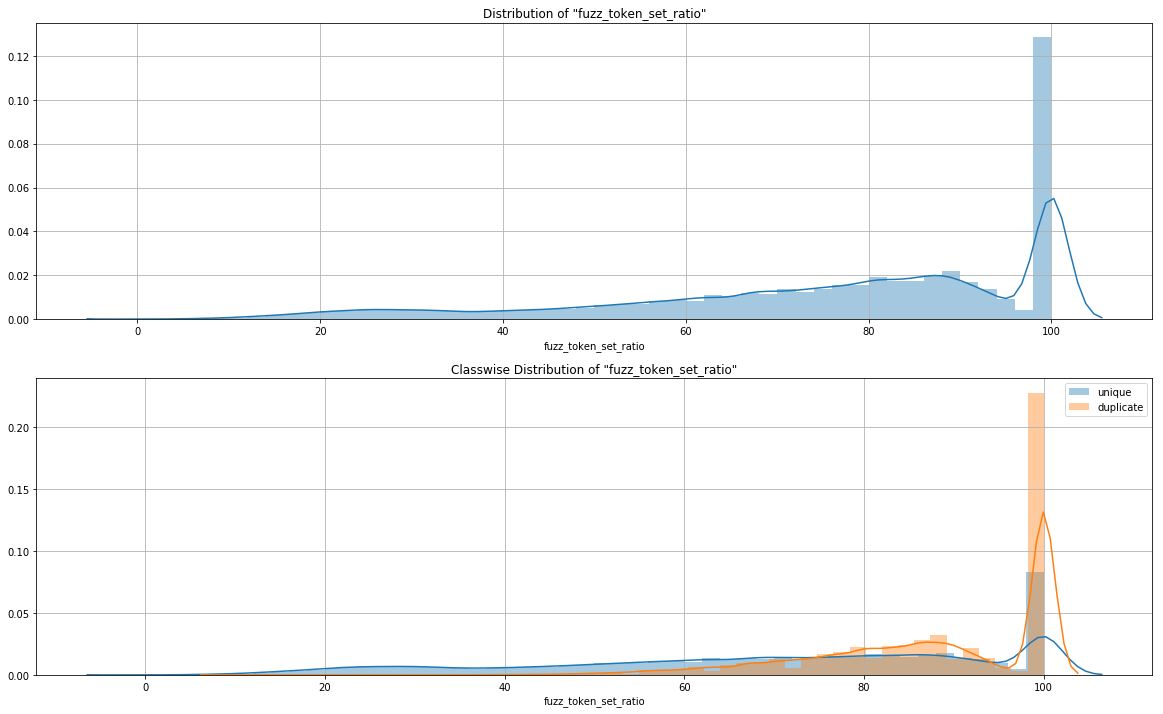

In [10]:
data['fuzz_token_set_ratio'] = data[['q1_clean', 'q2_clean']].progress_apply(
    lambda row: fuzz.token_set_ratio(str(row['q1_clean']).split(), str(row['q2_clean']).split()),
    axis=1
)

print(feature_distribution(data, 'fuzz_token_set_ratio', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'fuzz_token_set_ratio', 'is_duplicate', labels=['unique', 'duplicate'])

In [11]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,...,abs_word_diff,avg_num_word,rel_word_diff,word_intersection,word_union,jaccard_similarity_word,lcs_word,lcs_word_ratio,fuzz_simple_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,13.0,0.153846,10,13,0.769231,...,1,6.5,0.153846,5,6,0.833333,6,0.923077,92,98,92,100
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,10.5,0.476190,4,16,0.250000,...,5,7.5,0.666667,4,11,0.363636,4,0.533333,64,91,62,89
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,12.0,0.333333,3,21,0.142857,...,1,5.5,0.181818,3,8,0.375000,1,0.181818,66,67,71,85
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,10.0,0.200000,0,19,0.000000,...,4,7.0,0.571429,0,11,0.000000,0,0.000000,44,56,15,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,10.0,0.600000,2,18,0.111111,...,5,7.5,0.666667,2,13,0.153846,1,0.133333,52,64,42,53


In [12]:
feats = ['abs_token_diff', 'avg_num_token', 'rel_token_diff', 
         'token_intersection', 'token_union', 'jaccard_similarity_token',
         'lcs_token', 'lcs_token_ratio',
         'abs_word_diff', 'avg_num_word', 'rel_word_diff',
         'word_intersection', 'word_union', 'jaccard_similarity_word',
         'lcs_word', 'lcs_word_ratio',
         'fuzz_simple_ratio', 'fuzz_partial_ratio', 'fuzz_token_sort_ratio', 'fuzz_token_set_ratio'
]
pbc = []
for feat in feats:
    pbc.append(point_biserial_correlation('is_duplicate', feat, data))

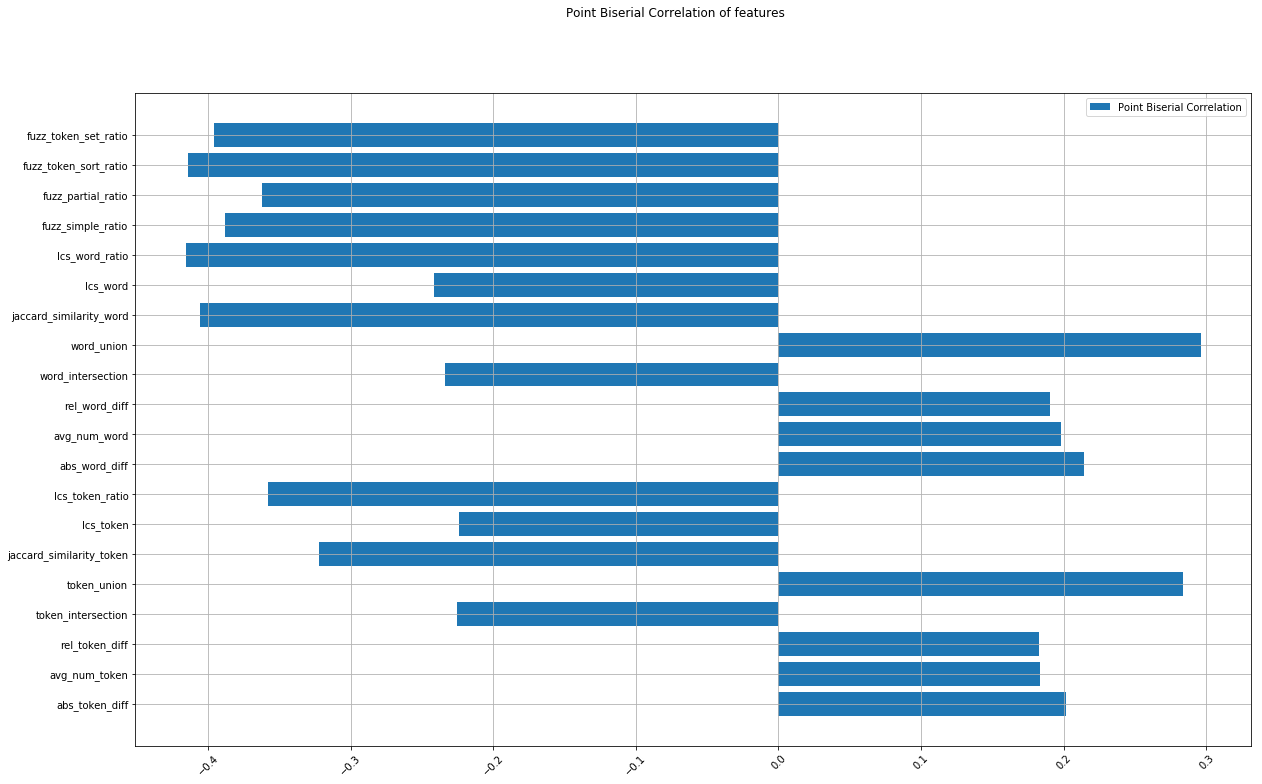

In [13]:
fig, ax = plt.subplots(figsize=(20, 12))
fig.suptitle('Point Biserial Correlation of features')
plt.barh(y=feats, width=pbc)
ax.grid()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.legend(['Point Biserial Correlation'])

# Model Fitting

In [14]:
from sklearn.linear_model import LogisticRegression

Mean Loss 0.5529477433466055 +- 0.0022935072251370173


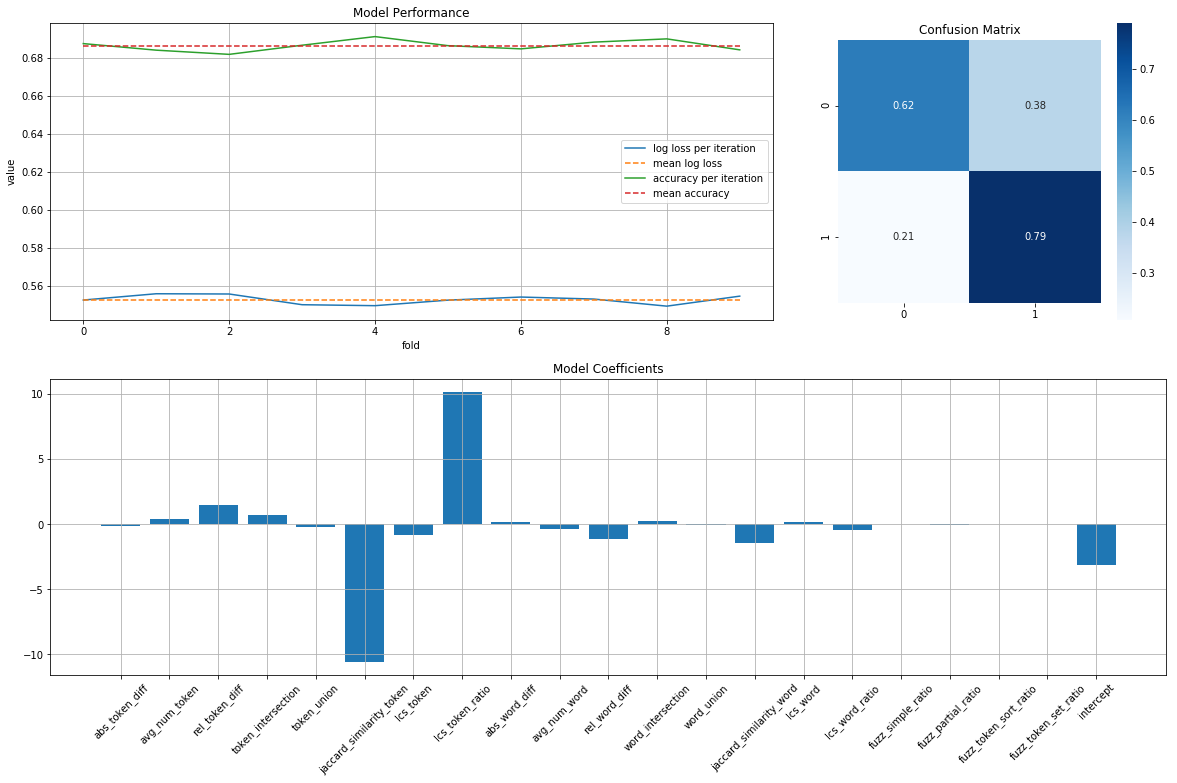

In [15]:
model = LogisticRegression(class_weight='balanced')
lr_performance, lr_model = train_model_lr(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(lr_performance['log loss']), '+-', np.std(lr_performance['log loss']))

In [16]:
data.to_csv('fuzzy_features_clean.csv', index=False)